#  **2 processing data formats with pylibs**

In [ ]:
#install and import pylibs
!pip install pylibs-ocean[shapefile,eof]
from pylib import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.6/395.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.2 MB/s eta 0:00:00


In [ ]:
#download training dataset
!rm *.txt *.zip *.nc *.csv *.dbf *.prj *sh? *.npz #clean existing data first
urlsave('https://docs.google.com/uc?export=download&id=1o6m70CuQr-vcTLLTc9EY_0cb3L_qkQQV','cybertrainingdata_2024.zip')
!unzip cybertrainingdata_2024.zip

rm: cannot remove '*.txt': No such file or directory
rm: cannot remove '*.zip': No such file or directory
rm: cannot remove '*.nc': No such file or directory
rm: cannot remove '*.csv': No such file or directory
rm: cannot remove '*.dbf': No such file or directory
rm: cannot remove '*.prj': No such file or directory
rm: cannot remove '*sh?': No such file or directory
rm: cannot remove '*.npz': No such file or directory
Archive:  cybertrainingdata_2024.zip
  inflating: elev_model.npz          
  inflating: GEBCO.nc                
  inflating: JMSMH_10122020.csv      
  inflating: noaa_elev.npz           
  inflating: SFBay.dbf               
  inflating: SFBay.prj               
  inflating: SFBay.shp               
  inflating: SFBay.shx               
  inflating: SFBay_temp.npz          
  inflating: SFBayWQ.npz             
  inflating: USGS_flow_data.txt      
  inflating: USGS_flow.txt           
  inflating: YRK005.40_7312023.csv   


## **2.1 what kind of data formats pylibs can handle?**

* ASCII files
  * file extention: txt, dat, csv, excel

* NetCDF files
  * file extention: nc

* shapefile
  * file extention: shp, prj

* geometry data
  * file extention: asc, tif, tiff, nc

* matlab data
  * file extention: mat

* SCHISM model data

## **2.2 read ASCII data**

**strategy**: parse line by line in the file.

**pros and cons**: This method is low-level, but it is a powerful and univeral method. It is not necessily inefficient.

### **2.2.1 basic skills**


In [ ]:
#1. list operations

a=[]
print('a=', a)

a.append(3)  #append a data at the end
print('a=', a)

a.extend([4,5])  #append a list of data at the end
print('a=', a)

a= []
a= [3]
a= [3, 4, 5]


In [ ]:
#2. convert between str and number

a=int('3')
b=float('3.14')
c=str(a)
d=str(b)

a,b,c,d


(3, 3.14, '3', '3.14')

In [ ]:
#3. convert datetime string to datetime number
a='2024-5-10 03:10:30'
b=datenum(a)
c=num2date(b)

a,b,c

('2024-5-10 03:10:30',
 739016.1322916667,
 datetime.datetime(2024, 5, 10, 3, 10, 30, tzinfo=datetime.timezone.utc))

In [ ]:
#4. parse string

a='there are 3 apples and 5 oranges'
a.split(' ') #convert string to list

b='1,2,3.14,4,5,6,7'
b.split(',') #convert string to list

['1', '2', '3.14', '4', '5', '6', '7']

In [ ]:
#5. convert list to numpy array

a=[1,2,3.14,4,5,6,7]
b=array(a)  #full function is np.array
# b=np.array(a)

a,b


([1, 2, 3.14, 4, 5, 6, 7], array([1.  , 2.  , 3.14, 4.  , 5.  , 6.  , 7.  ]))

In [ ]:
#6. read content of data files

#check the data file: USGS_flow.txt
# !head -n 50 USGS_flow.txt

In [ ]:

#read all the lines
lines=open('USGS_flow.txt','r').readlines()
# lines[:50]

In [ ]:
#remove the first 29 lines
lines=lines[29:]
lines[:50]

['USGS\t01578310\t2023-01-01\t38400\tA\n',
 'USGS\t01578310\t2023-01-02\t55500\tA\n',
 'USGS\t01578310\t2023-01-03\t72900\tA\n',
 'USGS\t01578310\t2023-01-04\t103000\tA\n',
 'USGS\t01578310\t2023-01-05\t136000\tA\n',
 'USGS\t01578310\t2023-01-06\t133000\tA\n',
 'USGS\t01578310\t2023-01-07\t116000\tA\n',
 'USGS\t01578310\t2023-01-08\t95100\tA\n',
 'USGS\t01578310\t2023-01-09\t85200\tA\n',
 'USGS\t01578310\t2023-01-10\t64000\tA\n',
 'USGS\t01578310\t2023-01-11\t57000\tA\n',
 'USGS\t01578310\t2023-01-12\t54100\tA\n',
 'USGS\t01578310\t2023-01-13\t48800\tA\n',
 'USGS\t01578310\t2023-01-14\t55900\tA\n',
 'USGS\t01578310\t2023-01-15\t49400\tA\n',
 'USGS\t01578310\t2023-01-16\t62300\tA\n',
 'USGS\t01578310\t2023-01-17\t63300\tA\n',
 'USGS\t01578310\t2023-01-18\t50200\tA\n',
 'USGS\t01578310\t2023-01-19\t53600\tA\n',
 'USGS\t01578310\t2023-01-20\t60300\tA\n',
 'USGS\t01578310\t2023-01-21\t66200\tA\n',
 'USGS\t01578310\t2023-01-22\t81900\tA\n',
 'USGS\t01578310\t2023-01-23\t84400\tA\n',
 'USGS\

### **2.2.2 read *.txt file**

Text(12.097222222222216, 0.5, 'flow (m3/s)')

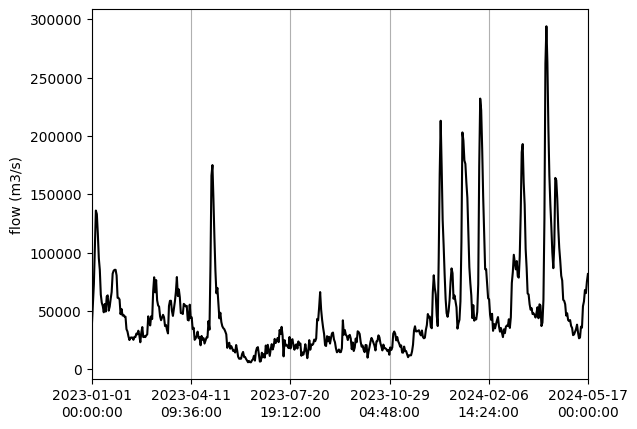

In [ ]:
lines=open('USGS_flow.txt','r').readlines()
lines=lines[29:]

times=[]; flow=[]
for line in lines:
    pline=line.split('\t')
    # print(pline)
    times.append(datenum(pline[2]))
    flow.append(float(pline[3]))

times=array(times)
flow=array(flow)

#plot
plot(times,flow,'k')
add_xtick()
ylabel('flow (m3/s)')

In [ ]:
#Tip: advanced method with inline loop
a=[*arange(10)]
b=[i*i for i in a]
a,b

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 4, 9, 16, 25, 36, 49, 64, 81])

Text(12.097222222222216, 0.5, 'flow (m3/s)')

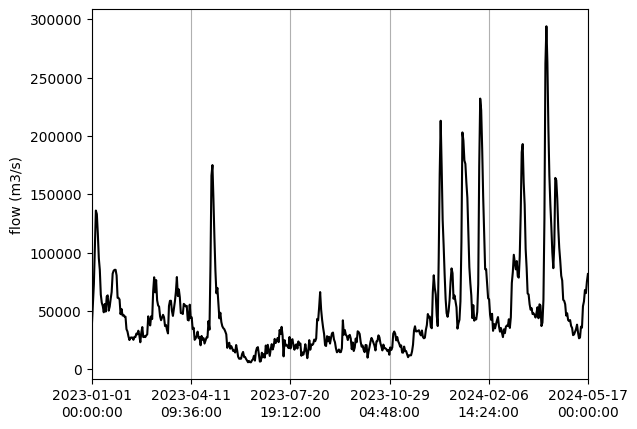

In [ ]:
mtimes=array([datenum(line.split('\t')[2]) for line in open('USGS_flow.txt','r').readlines()[29:]])
flow=array([float(line.split('\t')[3]) for line in open('USGS_flow.txt','r').readlines()[29:]])

#plot
plot(times,flow,'k')
add_xtick()
ylabel('flow (m3/s)')

### **2.2.3 read file with loadtxt**

It works only for file with structured numbers

In [ ]:
#view USGS_flow_data.txt

!head -n 20 USGS_flow_data.txt

0 38400.0
1 55500.0
2 72900.0
3 103000.0
4 136000.0
5 133000.0
6 116000.0
7 95100.0
8 85200.0
9 64000.0
10 57000.0
11 54100.0
12 48800.0
13 55900.0
14 49400.0
15 62300.0
16 63300.0
17 50200.0
18 53600.0
19 60300.0


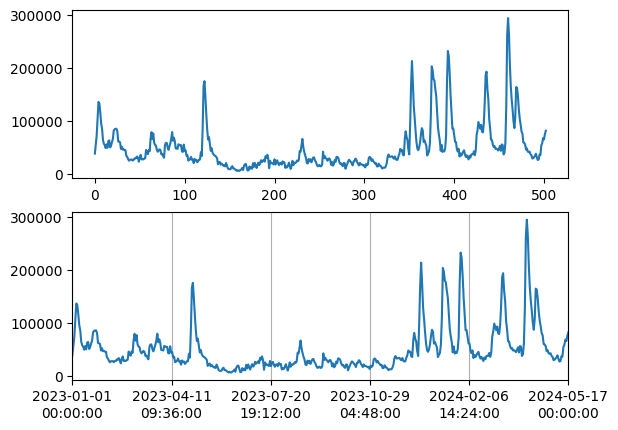

In [ ]:
#read USGS_flow_data.txt with loadtxt

data=loadtxt('USGS_flow_data.txt')

times=data[:,0]; flow=data[:,1]

subplot(2,1,1)
plot(times,flow)

subplot(2,1,2)
plot(times+datenum(2023,1,1),flow)  #add starting time
add_xtick()

### **2.2.4 read *.csv file**
this is special format for ASCII file, seperated by comma.

File `JMSMH_10122020.csv` is dataflow measured in [James River](http://vecos.vims.edu/SegmentDetail.aspx?param=JMSMH&program=DFLO), VA. We will work on this file as an example to process *.csv data.

In [ ]:
#this is dataflow observation data
!head -n 10 JMSMH_10122020.csv

idCollectionEvent,PROJECT,SOURCE,SAMPLE_DATETIME,CRUISE_TRACK,WATER_BODY,PRI_SEG,STATION,SONDE,LATITUDE,LONGITUDE,DEPTH,LAYER,TOTAL_DEPTH,TOTAL_DEPTH_UNITS,TOTAL_DEPTH_A,BOAT_SPEED,BOAT_SPEED_UNITS,BOAT_SPEED_A,BATT,BATT_A,WTEMP,WTEMP_UNITS,WTEMP_A,WTEMP_QUALIFIER,WTEMP_METHOD,SPCOND,SPCOND_UNITS,SPCOND_A,SPCOND_QUALIFIER,SPCOND_METHOD,SALINITY,SALINITY_UNITS,SALINITY_A,SALINITY_QUALIFIER,SALINITY_METHOD,DO_SAT,DO_SAT_UNITS,DO_SAT_A,DO_SAT_QUALIFIER,DO_SAT_METHOD,DO,DO_UNITS,DO_A,DO_QUALIFIER,DO_METHOD,PH,PH_UNITS,PH_A,PH_QUALIFIER,PH_METHOD,TURB_NTU,TURB_NTU_UNITS,TURB_NTU_A,TURB_NTU_QUALIFIER,TURB_NTU_METHOD,FLUOR,FLUOR_UNITS,FLUOR_A,FLUOR_QUALIFIER,FLUOR_METHOD,TCHL_PRE_CAL,TCHL_PRE_CAL_UNITS,TCHL_PRE_CAL_A,TCHL_PRE_CAL_QUALIFIER,TCHL_PRE_CAL_METHOD,CHLA,CHLA_UNITS,CHLA_A,CHLA_QUALIFIER,CHLA_METHOD,COMMENTS
15918,DFLO,HRSD,10/12/2020 8:48,JMS10122020,JAMES RIVER,JMSMH,JMSMH,16G101639,37.0109,-76.4636,0.5,BS,3.8,M,,28.65,KNOTS, ,12.3,,20.14,DEG C,, ,F01,27360,UMHOS/COM,, ,F01,16.84,P

Text(0.5, 1.0, 'CHLA')

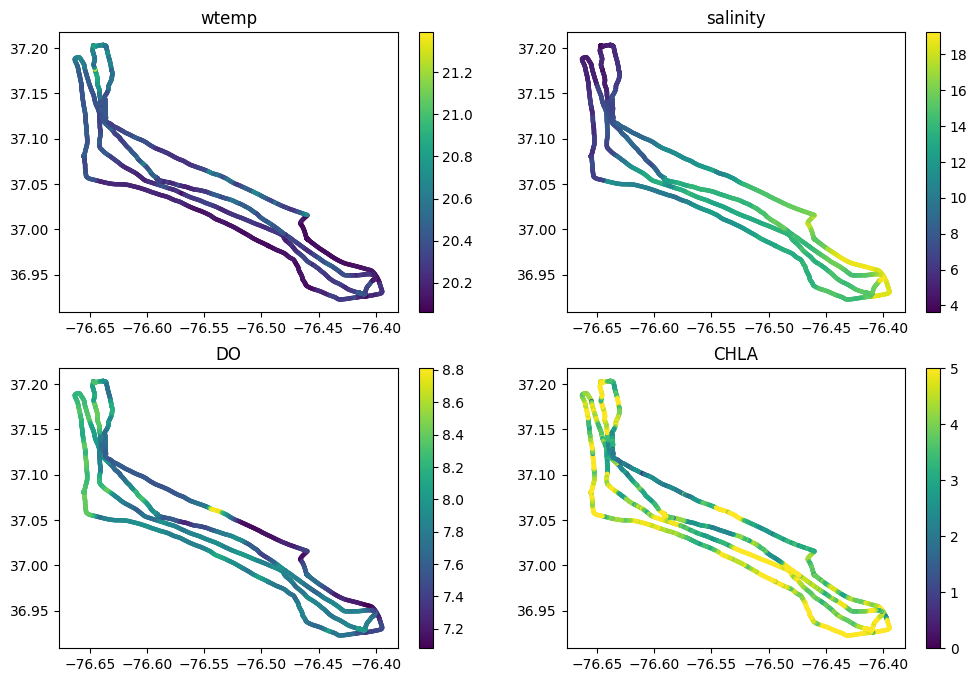

In [ ]:
#read dataflow data
lines=open('JMSMH_10122020.csv','r').readlines()
header=lines[0].split(',')
times=[]; lon=[]; lat=[]; DO=[]; wtemp=[]; salt=[]; chla=[]
for line in lines[1:]:
  pline=line.split(',')

  id=header.index('SAMPLE_DATETIME')
  times.append(datenum(pline[id]))

  id=header.index('LATITUDE')
  lat.append(float(pline[id]))

  id=header.index('LONGITUDE')
  lon.append(float(pline[id]))

  id=header.index('DO')
  DO.append(float(pline[id]))

  id=header.index('WTEMP')
  wtemp.append(float(pline[id]))

  id=header.index('SALINITY')
  salt.append(float(pline[id]))

  id=header.index('TCHL_PRE_CAL')
  chla.append(float(pline[id]))

#convert list to numpy array
times=array(times); lon=array(lon); lat=array(lat); DO=array(DO)
wtemp=array(wtemp); salt=array(salt); chla=array(chla)


#plot
figure(figsize=[12,8])
subplot(2,2,1)
scatter(lon,lat,s=5,c=wtemp)
colorbar(); title('wtemp')

subplot(2,2,2)
scatter(lon,lat,s=5,c=salt)
colorbar(); title('salinity')

subplot(2,2,3)
scatter(lon,lat,s=5,c=DO)
colorbar(); title('DO')

subplot(2,2,4)
scatter(lon,lat,s=5,c=chla,vmin=0,vmax=5)
colorbar(); title('CHLA')



## **2.3 read NetCDF data**

pylibs provides a function `ReadNC` (or use generic function `read`) to read netcdf data

In [ ]:
#check options of ReadNC

ReadNC?

In [ ]:
#2.3.1 read digital elevation data in New England region
C=read('GEBCO.nc',2)  #read data only
C.INFO


['file_format: "NETCDF4", string',
 "dimname: list['Latitude', 'Longitude']",
 'dims  : list[1802, 2581]',
 'dim_unlimited: list(2,)',
 'attrs : list(1,)',
 'vars  : array(3,), <U4',
 'lon   : array(2581,), float64',
 'lat   : array(1802,), float64',
 'elev  : array(1802, 2581), float32']

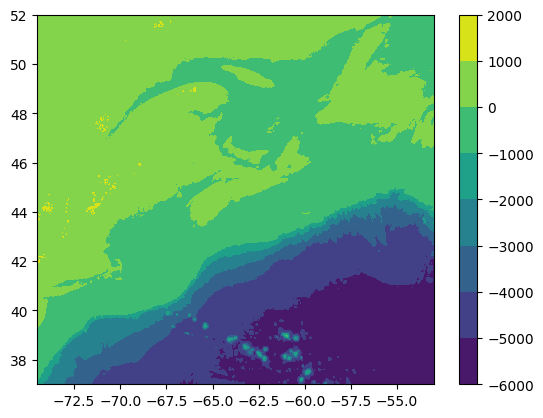

In [ ]:
#plots
contourf(C.lon,C.lat,C.elev); colorbar()

In [ ]:
#2.3.2 read GEBCO.nc with attributes of varables
C=read('GEBCO.nc')
C.lon.INFO

["dimname: <class 'tuple'>",
 'dims  : list(1,)',
 "val   : <class 'numpy.ma.core.MaskedArray'>",
 'attrs : list(0,)']

In [ ]:
#2.3.3 read large file through file handle
fid=read('GEBCO.nc',1)

fid.variables #show all variables

fid.variables['elev'] # show single variable information

array(fid.variables['elev'][:]) #get variable values

array([[  380.,   365.,   359., ...,  -227.,  -229.,  -230.],
       [  365.,   370.,   366., ...,  -228.,  -229.,  -230.],
       [  341.,   337.,   336., ...,  -230.,  -229.,  -230.],
       ...,
       [-1286., -1369., -1409., ..., -5424., -5426., -5427.],
       [-1342., -1449., -1525., ..., -5426., -5428., -5429.],
       [-1437., -1529., -1606., ..., -5428., -5430., -5431.]],
      dtype=float32)

In [ ]:
#get variable values
array(fid.variables['elev'][:])

array([[  380.,   365.,   359., ...,  -227.,  -229.,  -230.],
       [  365.,   370.,   366., ...,  -228.,  -229.,  -230.],
       [  341.,   337.,   336., ...,  -230.,  -229.,  -230.],
       ...,
       [-1286., -1369., -1409., ..., -5424., -5426., -5427.],
       [-1342., -1449., -1525., ..., -5426., -5428., -5429.],
       [-1437., -1529., -1606., ..., -5428., -5430., -5431.]],
      dtype=float32)

## **2.4 read shapefile**

pylibs provides a function `read_shp` (or use generic function `read`) to read

In [ ]:
!ls

cybertrainingdata_2024.zip  JMSMH_10122020.csv	SFBay.dbf  SFBay.shx	   USGS_flow_data.txt
elev_model.npz		    noaa_elev.npz	SFBay.prj  SFBay_temp.npz  USGS_flow.txt
GEBCO.nc		    sample_data		SFBay.shp  SFBayWQ.npz	   YRK005.40_7312023.csv


In [ ]:
read_shp?

In [ ]:
#read San Francisco Bay boundary froms shapefile
C=read('SFBay.shp')
C.INFO

['nrec  : 1, int',
 'type  : "POLYLINE", string',
 'xy    : array(6359, 2), object',
 'attname: array(1,), <U5',
 'attvalue: array(1,), object',
 'atttype: array(1,), object',
 'prj   : "GEOGCS["GCS_WGS_1984",DATUM["D", string']

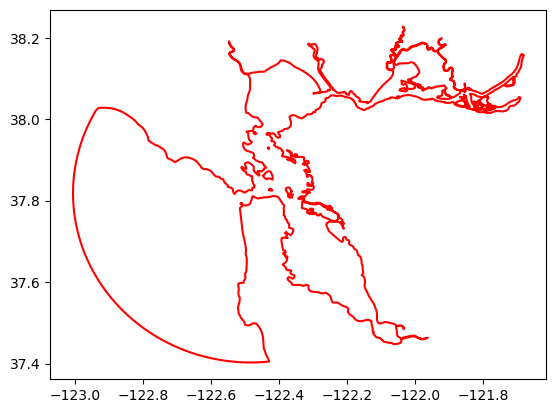

In [ ]:
#plot
plot(C.xy[:,0],C.xy[:,1],'r-')

## **2.5 read excel files**

pylibs provides a function `read_excel` (or use generic function `read`) to read excel data

### **usage**
`read_excel(fname, sht=0, fmt=0)`

* fname: name of Excel file
* sht:   name of sheet_name, or number of sheet (default is 0)
* fmt=0: not treat 1st line as header, return data only; fmt=1: treat 1st line as header, return header and data


## **2.6 write files**

pylibs provides functions to write different data formats.

* netcdf: `WriteNC`
* shapefile: `write_shp`
* excel: `write_excel`

In [ ]:
#Examples: write SFBay boundary information to a ASCII file
C=read('SFBay.shp')
lines=['{} {}\n'.format(*xyi) for xyi in C.xy]
fid=open('SFBay.txt','w+'); fid.writelines(lines); fid.close()

In [ ]:
!head -n 20 SFBay.txt

nan nan
-121.829367 38.024293
-121.827895 38.024368
nan nan
-121.827895 38.024368
-121.826434 38.024282
-121.825223 38.024135
-121.823651 38.022947
-121.821894 38.021929
-121.820196 38.020858
-121.818554 38.019724
-121.81667 38.018876
-121.815823 38.018299
-121.814201 38.017895
-121.812517 38.017716
-121.810839 38.017366
-121.809147 38.017159
-121.807433 38.016962
-121.805742 38.017206
-121.804064 38.017468


## **Excercise 1**

Data file `YRK005.40_7312023.csv` is the continuously monitoring data measurements (usually called CMON) in July, 2023 at York River near VIMS. Please read this file, and plot the time series of water temperature, salinity, DO and total_depth (water level).

In [ ]:
#Type your answer 1 here